## IMPORTING THE NECESSARY LIBRARIES 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

df = pd.read_csv("customer_churn-_1_.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2907,0611-DFXKO,Male,0,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.00,1820.45,Yes
410,0334-GDDSO,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.35,233.7,Yes
4550,4625-XMOYM,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),26.25,1988.05,No
1804,6016-LVTJQ,Female,0,Yes,Yes,34,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,716.4,No
48,7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.8,No


In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values  

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# pd.to_numeric(df.TotalCharges)

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[4380].TotalCharges

' '

In [12]:
df1 = df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [14]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [16]:
 def column_unique_value(df):
     for column in df:
         if df[column].dtype == 'object':
             print(f'{column}: {df[column].unique()} ')
     
def column_unique_value_all(df):
     for column in df:
             print(f'{column}: {df[column].unique()} ')
     


In [17]:
 column_unique_value(df1)

gender: ['Female' 'Male'] 
Partner: ['Yes' 'No'] 
Dependents: ['No' 'Yes'] 
PhoneService: ['No' 'Yes'] 
MultipleLines: ['No phone service' 'No' 'Yes'] 
InternetService: ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity: ['No' 'Yes' 'No internet service'] 
OnlineBackup: ['Yes' 'No' 'No internet service'] 
DeviceProtection: ['No' 'Yes' 'No internet service'] 
TechSupport: ['No' 'Yes' 'No internet service'] 
StreamingTV: ['No' 'Yes' 'No internet service'] 
StreamingMovies: ['No' 'Yes' 'No internet service'] 
Contract: ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling: ['Yes' 'No'] 
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn: ['No' 'Yes'] 


In [18]:
df1.replace('No internet service','No',inplace = True)

C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\2554047958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)


In [19]:
df1.replace('No phone service','No',inplace = True)

C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\194615576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [20]:
 column_unique_value(df1)

gender: ['Female' 'Male'] 
Partner: ['Yes' 'No'] 
Dependents: ['No' 'Yes'] 
PhoneService: ['No' 'Yes'] 
MultipleLines: ['No' 'Yes'] 
InternetService: ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity: ['No' 'Yes'] 
OnlineBackup: ['Yes' 'No'] 
DeviceProtection: ['No' 'Yes'] 
TechSupport: ['No' 'Yes'] 
StreamingTV: ['No' 'Yes'] 
StreamingMovies: ['No' 'Yes'] 
Contract: ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling: ['Yes' 'No'] 
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn: ['No' 'Yes'] 


In [21]:
yes_no =  ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in yes_no:
    df1[column].replace({'Yes':1,'No':0}, inplace = True)
    

C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\103765259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace({'Yes':1,'No':0}, inplace = True)
C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\103765259.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[column].replace(

In [22]:
df1['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\1164335570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
C:\Users\Bhuvan\AppData\Local\Temp\ipykernel_23488\1164335570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gende

In [23]:
 column_unique_value_all(df1)

gender: [0 1] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
InternetService: ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
Contract: ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling: [1 0] 
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 


In [24]:
df2 =  pd.get_dummies(data =df1 , columns= ['InternetService','Contract','PaymentMethod'])

In [25]:
column_unique_value_all(df2)

gender: [0 1] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
PaperlessBilling: [1 0] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 
InternetService_DSL: [ True False] 
InternetService_Fiber optic: [False  True] 
InternetService_No: [False  True] 
Contract_Month-to-month: [ True False] 
Contract_One year: [False  True] 
Contract_Two year: [False  True] 
PaymentMethod_Bank transfer (automatic): [False  True] 
PaymentMethod_Credit card (automatic): [False  True] 
PaymentMethod_Electroni

In [26]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [27]:
df2['InternetService_DSL'].values

array([ True,  True,  True, ...,  True, False, False])

In [28]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
def insert(df):
    my_list = []
    for column in df:
        if df[column].dtype == bool:
            my_list.append(column)
    return my_list
columns_to_convert  = insert(df2)
print(columns_to_convert)

['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [30]:
for value in columns_to_convert:
    df2[value] = df2[value].astype(int)

        

In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [32]:
column_unique_value_all(df2)

gender: [0 1] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
TechSupport: [0 1] 
StreamingTV: [0 1] 
StreamingMovies: [0 1] 
PaperlessBilling: [1 0] 
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 
Churn: [0 1] 
InternetService_DSL: [1 0] 
InternetService_Fiber optic: [0 1] 
InternetService_No: [0 1] 
Contract_Month-to-month: [1 0] 
Contract_One year: [0 1] 
Contract_Two year: [0 1] 
PaymentMethod_Bank transfer (automatic): [0 1] 
PaymentMethod_Credit card (automatic): [0 1] 
PaymentMethod_Electronic check: [1 0] 
PaymentMethod_Mailed check: [0 1] 


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaling_column = ['MonthlyCharges','tenure','TotalCharges']
scaler  = MinMaxScaler()
df2[scaling_column] = scaler.fit_transform(df2[scaling_column] )

In [35]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
column_unique_value_all(df2)

gender: [0 1] 
SeniorCitizen: [0 1] 
Partner: [1 0] 
Dependents: [0 1] 
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] 
PhoneService: [0 1] 
MultipleLines: [0 1] 
OnlineSecurity: [0 1] 
OnlineBackup: [1 0] 
DeviceProtection: [0 1] 
Tech

In [37]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [38]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [39]:
X_train.shape,X_test.shape

((5274, 26), (1758, 26))

In [40]:
y_train.shape,y_test.shape

((5274,), (1758,))

In [41]:
y_train[:10]

4544    1
5992    1
2138    0
4082    1
4155    0
72      0
6171    0
6598    0
3276    1
6156    0
Name: Churn, dtype: int64

## TRAINING THE DATASET

### 1. LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Text(20.72222222222222, 0.5, 'Truth')

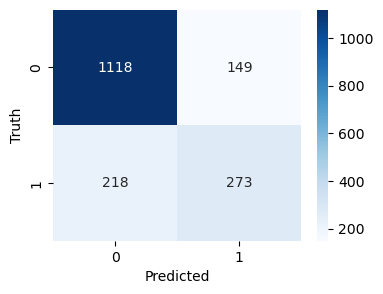

In [43]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (4,3))
sn.heatmap(cm1, annot=True, fmt='d',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
from sklearn.metrics import accuracy_score
print("accuracy =" ,accuracy_score(y_test, y_pred))


accuracy = 0.7912400455062572


### 2. DECISION TREE

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Text(20.72222222222222, 0.5, 'Truth')

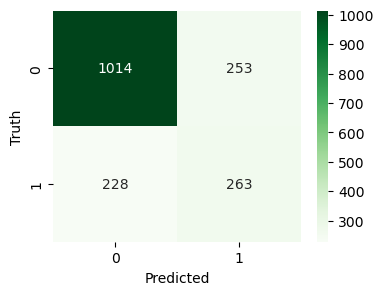

In [46]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (4,3))
sn.heatmap(cm2, annot=True, fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
from sklearn.metrics import accuracy_score
print("accuracy =" ,accuracy_score(y_test, y_pred))

accuracy = 0.7263936291240045


### 3. NAIVE BAYES 

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Text(20.72222222222222, 0.5, 'Truth')

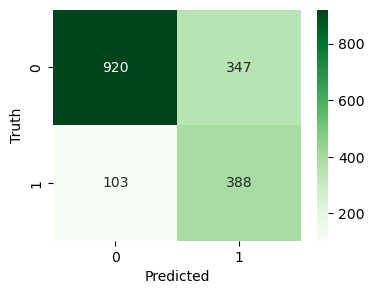

In [49]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)


import seaborn as sn
plt.figure(figsize = (4,3))
sn.heatmap(cm3, annot=True, fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
from sklearn.metrics import accuracy_score
print("accuracy =" ,accuracy_score(y_test, y_pred))

accuracy = 0.7440273037542662


### 4. RANDOM FOREST 

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Text(20.72222222222222, 0.5, 'Truth')

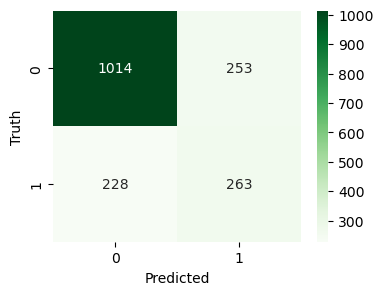

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (4,3))
sn.heatmap(cm2, annot=True, fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import accuracy_score
print("accuracy =" ,accuracy_score(y_test, y_pred))

accuracy = 0.7724687144482366


### 5. ANN 

In [54]:
# First, install TensorFlow using pip
!pip install tensorflow

# Then import the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [55]:
ann = Sequential()

# Input + Hidden layer 1
ann.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layer 2
ann.add(Dense(16, activation='relu'))

# Optional dropout (to reduce overfitting)
ann.add(Dropout(0.2))

# Output layer (Binary classification)
ann.add(Dense(1, activation='sigmoid'))


C:\Users\Bhuvan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = ann.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7234 - loss: 0.5403 - val_accuracy: 0.7611 - val_loss: 0.4633
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7952 - loss: 0.4375 - val_accuracy: 0.7820 - val_loss: 0.4433
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7990 - loss: 0.4243 - val_accuracy: 0.7810 - val_loss: 0.4440
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8028 - loss: 0.4250 - val_accuracy: 0.7858 - val_loss: 0.4380
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8018 - loss: 0.4172 - val_accuracy: 0.7839 - val_loss: 0.4371
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8099 - loss: 0.4132 - val_accuracy: 0.7877 - val_loss: 0.4362
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8037 - loss: 0.4106 - val_accuracy: 0.7867 - val_loss: 0.4348
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - loss: 0.4086 - val_accuracy: 0

In [ ]:
ann_loss, ann_accuracy = ann.evaluate(X_test, y_test)
print("ANN Test Accuracy:", ann_accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# ANN predictions (important step)
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

# Plot
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('ANN Confusion Matrix')
plt.show()
